In [130]:
import pandas as pd
df = pd.read_csv("diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [131]:
df.shape

(768, 9)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [133]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [134]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [135]:
df.isnull().sum().sum()

0

In [136]:
numeric_col=df.select_dtypes(include=['float64','int64']).columns
numeric_col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [137]:

numeric_col=df.select_dtypes(exclude=['float64','int64']).columns
numeric_col

Index([], dtype='object')

In [138]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index([], dtype='object')

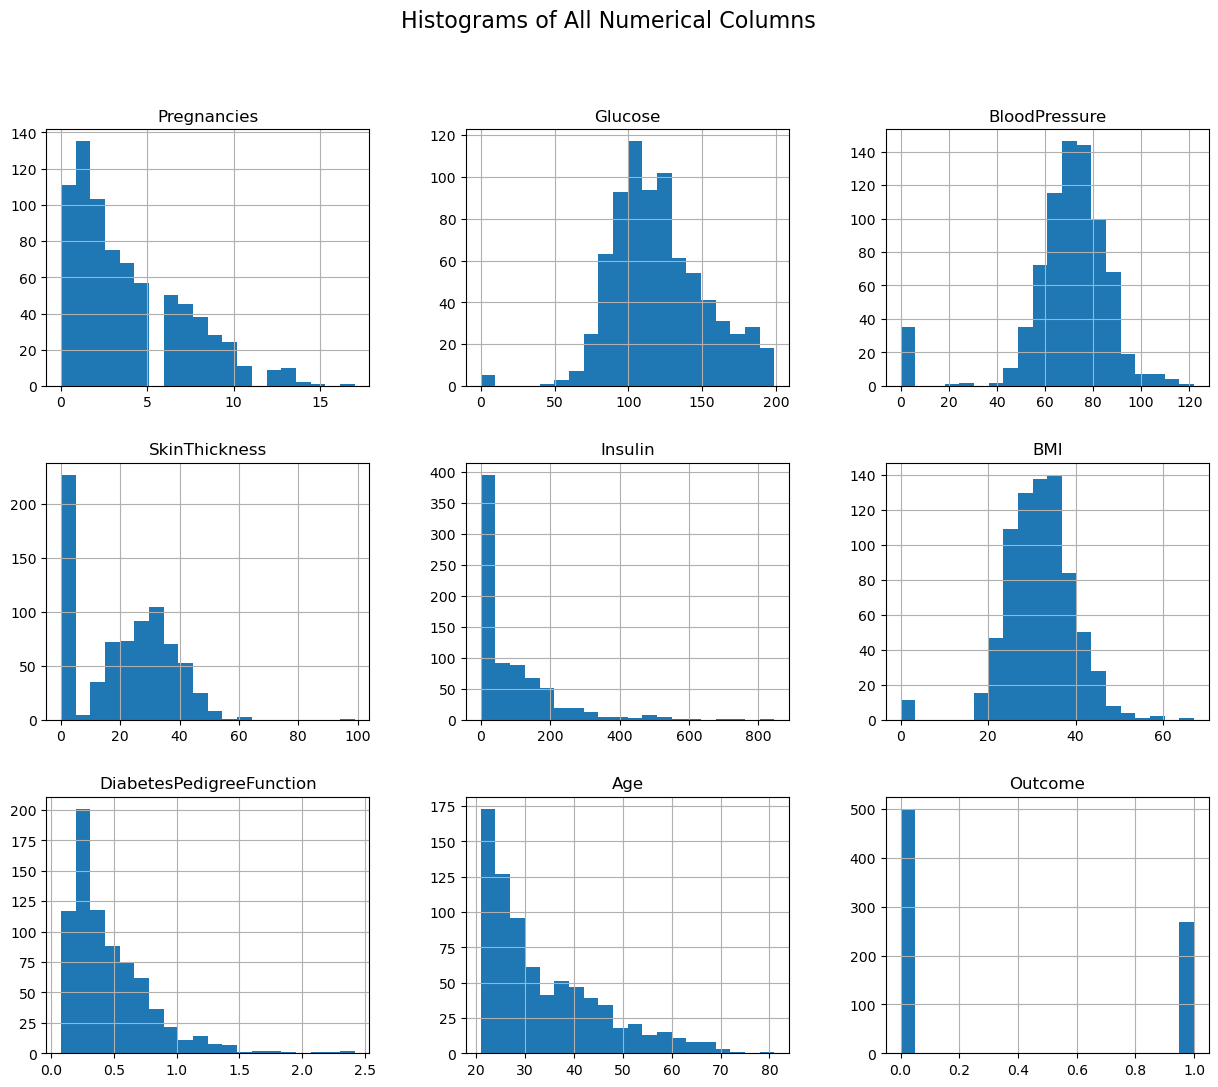

In [139]:
import matplotlib.pyplot as plt

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of All Numerical Columns", fontsize=16)
plt.show()

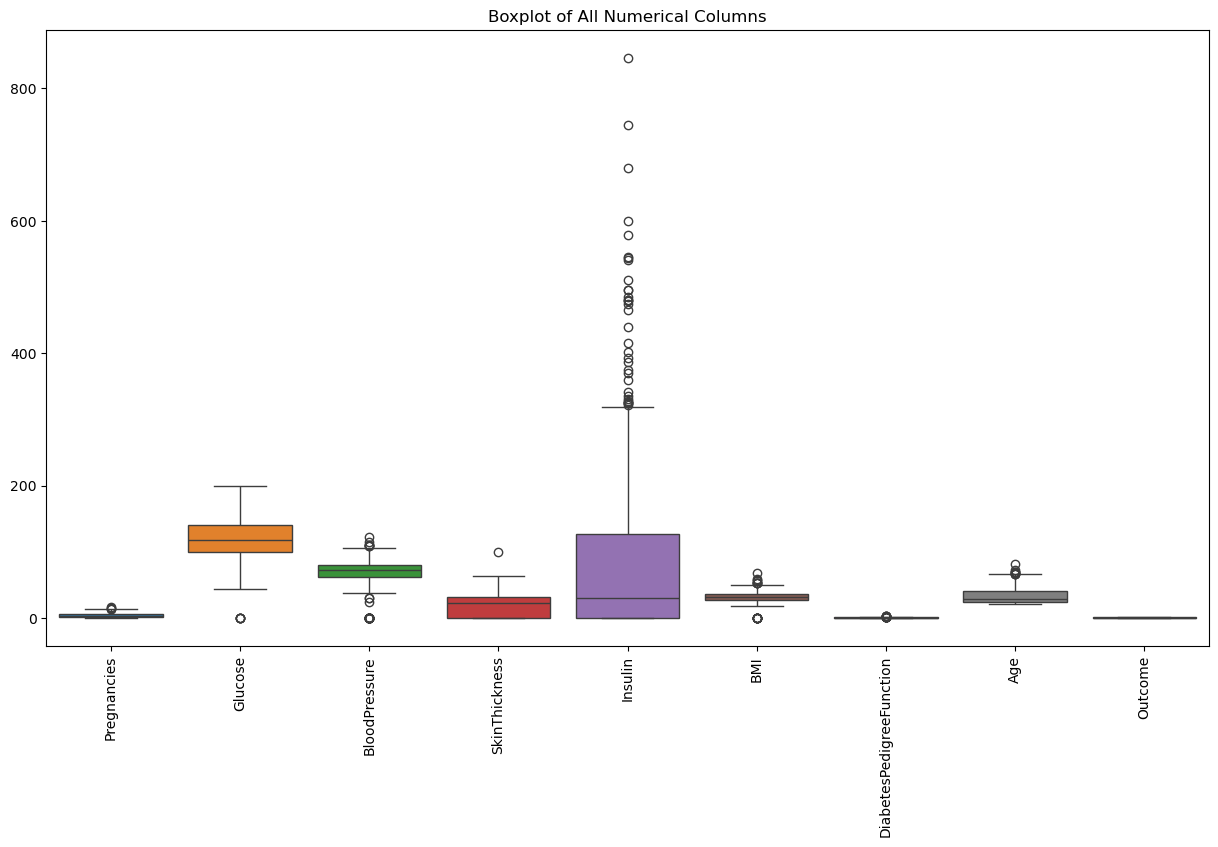

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Columns")
plt.show()


In [141]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Keep only values inside the range
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
   
print("Outliers removed successfully.")

Outliers removed successfully.


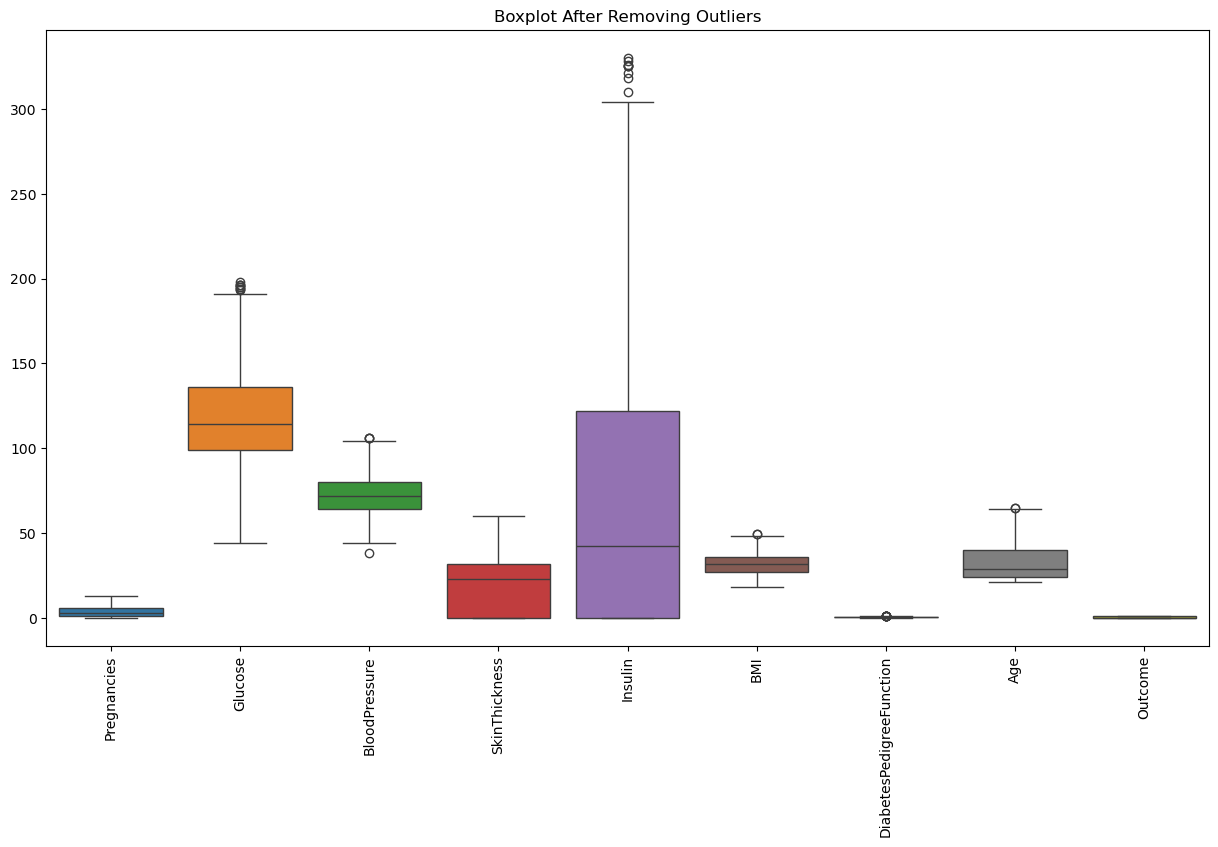

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot After Removing Outliers")
plt.show()

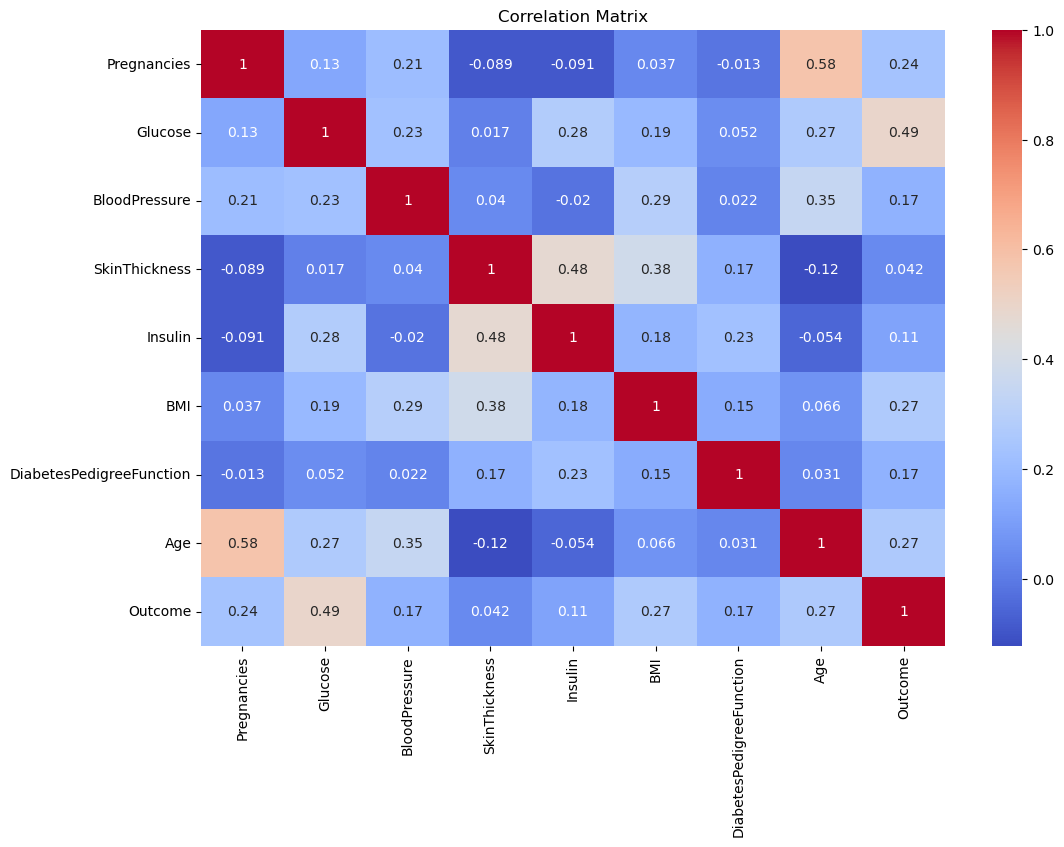

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [144]:
df_countable = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_countable.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [145]:
# standardization SCALING 
from sklearn .preprocessing import StandardScaler 
SS = StandardScaler()
SS_X = SS.fit_transform(df_countable)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df_countable)
SS_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898
4,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026
...,...,...,...,...,...,...,...,...
631,1.912638,-0.616743,0.353530,1.790752,1.328560,0.146705,-1.042232,2.800503
632,-0.549787,0.108045,-0.177809,0.410962,-0.826197,0.758076,-0.352141,-0.510984
633,0.373623,0.073532,-0.000696,0.148145,0.514540,-0.903598,-0.740062,-0.235026
634,-0.857590,0.246100,-1.063375,-1.363054,-0.826197,-0.292227,-0.315390,1.328731


In [146]:
outcome = df[['Outcome']]

In [147]:
df_final = pd.concat([SS_X,outcome],axis=1)
df_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688,1.0
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041,0.0
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055,1.0
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898,0.0
4,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026,NaN
...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [148]:
df_final = df_final.fillna(0)
df_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688,1.0
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041,0.0
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055,1.0
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898,0.0
4,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026,0.0
...,...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [149]:
# data partition
Y = df_final["Outcome"]
X = df_final.drop(df_final[['Outcome']],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)


In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [151]:
pip install lightgbm xgboost

Note: you may need to restart the kernel to use updated packages.


In [152]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.1, random_state=100,verbose=-1)

lgb_model.fit(X_train, Y_train)

Y_pred_lgbm = lgb_model.predict(X_test)

In [153]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)


C:\Users\RITHIKA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:22:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [154]:
def evaluate_model(Y_test, Y_pred):
    return {
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1-Score": f1_score(Y_test, Y_pred)
    }

lgbm_metrics = evaluate_model(Y_test, Y_pred_lgbm)
xgb_metrics = evaluate_model(Y_test, Y_pred_xgb)


In [156]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lgbm, X_train, Y_train, cv=5, scoring="f1")
print("LightGBM CV F1 Score:", cv_scores.mean())


LightGBM CV F1 Score: 0.16579365079365077


In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1]
}

grid = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, Y_train)
best_lgbm = grid.best_estimator_


In [159]:
import pandas as pd

comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "LightGBM": lgbm_metrics.values(),
    "XGBoost": xgb_metrics.values()
})

print(comparison)


      Metric  LightGBM   XGBoost
0   Accuracy  0.686667  0.673333
1  Precision  0.363636  0.333333
2     Recall  0.090909  0.113636
3   F1-Score  0.145455  0.169492


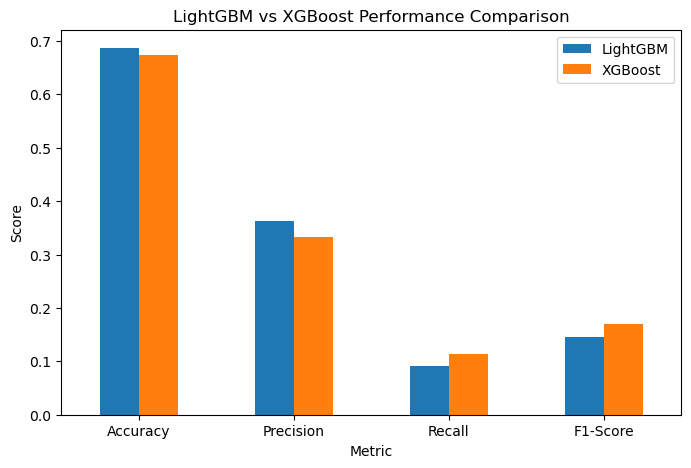

In [160]:
import matplotlib.pyplot as plt

comparison.set_index("Metric").plot(kind="bar", figsize=(8,5))
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()
